In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0 2.300000    0   
1   37    1   2     130   250    0        1       187     0 3.500000    0   
2   41    0   1     130   204    0        0       172     0 1.400000    2   
3   56    1   1     120   236    0        1       178     0 0.800000    2   
4   57    0   0     120   354    0        1       163     1 0.600000    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
df.describe().T

count       mean       std        min        25%        50%  \
age      302.000000  54.420530  9.047970  29.000000  48.000000  55.500000   
sex      302.000000   0.682119  0.466426   0.000000   0.000000   1.000000   
cp       302.000000   0.963576  1.032044   0.000000   0.000000   1.000000   
trtbps   302.000000 131.602649 17.563394  94.000000 120.000000 130.000000   
chol     302.000000 246.500000 51.753489 126.000000 211.000000 240.500000   
fbs      302.000000   0.149007  0.356686   0.000000   0.000000   0.000000   
restecg  302.000000   0.526490  0.526027   0.000000   0.000000   1.000000   
thalachh 302.000000 149.569536 22.903527  71.000000 133.250000 152.500000   
exng     302.000000   0.327815  0.470196   0.000000   0.000000   0.000000   
oldpeak  302.000000   1.043046  1.161452   0.000000   0.000000   0.800000   
slp      302.000000   1.397351  0.616274   0.000000   1.000000   1.000000   
caa      302.000000   0.718543  1.006748   0.000000   0.000000   0.000000   
thall    302.000000   2.314570  0.613026   0.000000   2.000000   2.000000   
output   302.000000   0.543046  0.498970   0.000000   0.000000   1.000000   

                75%        max  
age       61.000000  77.000000  
sex        1.000000   1.000000  
cp         2.000000   3.000000  
trtbps   140.000000 200.000000  
chol     274.750000 564.000000  
fbs        0.000000   1.000000  
restecg    1.000000   2.000000  
thalachh 166.000000 202.000000  
exng       1.000000   1.000000  
oldpeak    1.600000   6.200000  
slp        2.000000   2.000000  
caa        1.000000   4.000000  
thall      3.000000   3.000000  
output     1.000000   1.000000

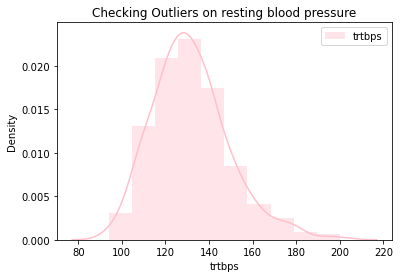

In [8]:
sns.color_palette("pastel")
plt.title('Checking Outliers on resting blood pressure')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='pink')
plt.legend()

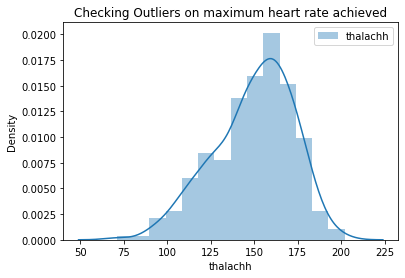

In [9]:
plt.title('Checking Outliers on maximum heart rate achieved')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

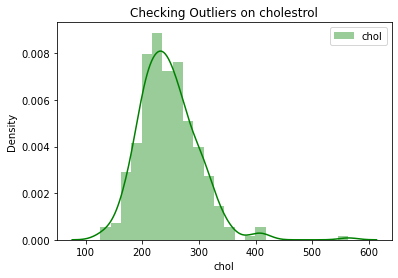

In [10]:
plt.title('Checking Outliers on cholestrol')
sns.distplot(df.chol, label='chol', kde=True, color='green')
plt.legend()

Number of people having sex as 0 are 96 and Number of people having sex as 1 are 206


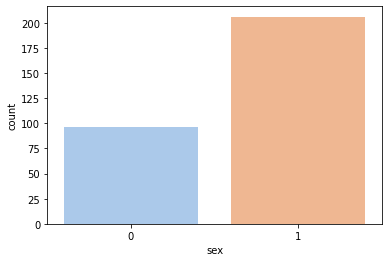

In [11]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
plt.figure(figsize=(6,4))
ax=plt.axes()
p = sns.countplot(data=df, x="sex", palette='pastel')

In [12]:
#The number of people belonging to sex category 0 are 96 whereas 1 are 206.
#The number of people in one category are more than double than the zero.

<AxesSubplot:xlabel='cp', ylabel='count'>

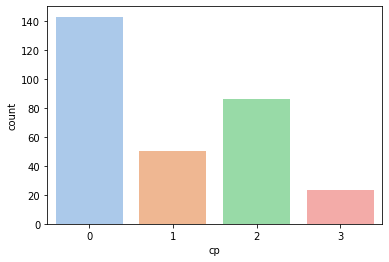

In [13]:
ax=plt.axis()
sns.countplot(x='cp', data=df, palette='pastel')

<AxesSubplot:xlabel='fbs', ylabel='count'>

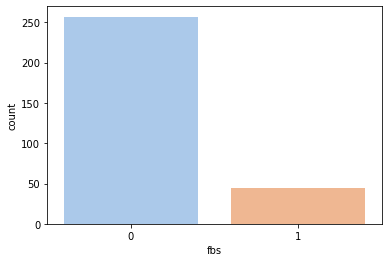

In [14]:
sns.countplot(x='fbs', data=df, palette='pastel')

In [15]:
#^^ People of fbs category 1 are less than 25% of people of fbs category 0.

<AxesSubplot:xlabel='caa', ylabel='age'>

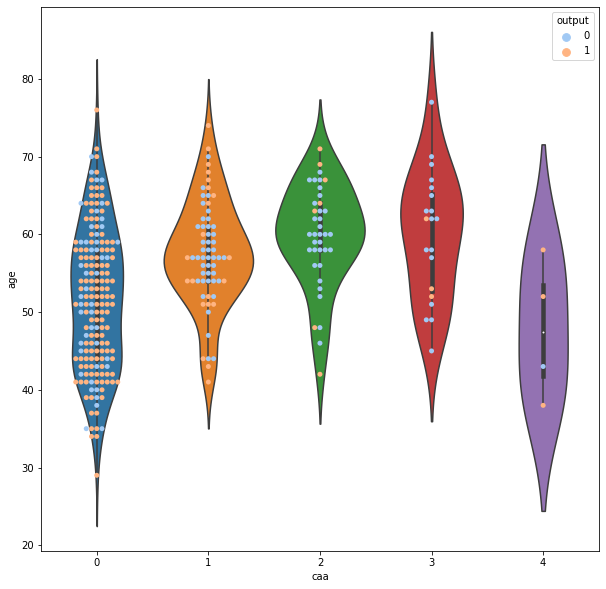

In [16]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

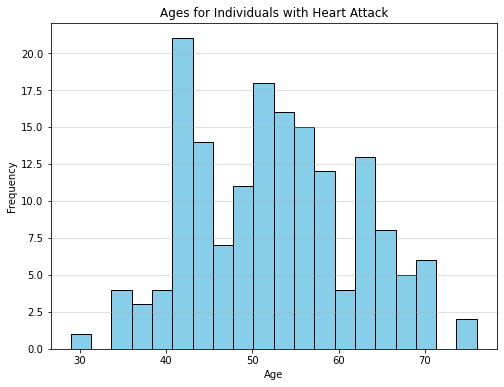

In [17]:
heart_attack_data = df[df['output'] == 1]

plt.figure(figsize=(8, 6))
plt.hist(heart_attack_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Ages for Individuals with Heart Attack')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

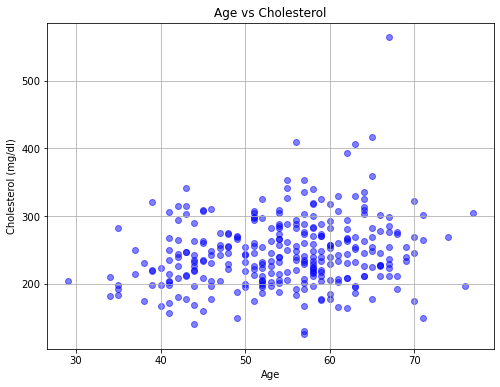

Correlation: 0.2072155056561174


In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['chol'], alpha=0.5, color='blue')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.grid(True)
plt.show()
correlation = df['age'].corr(df['chol'])
print(f"Correlation: {correlation}")

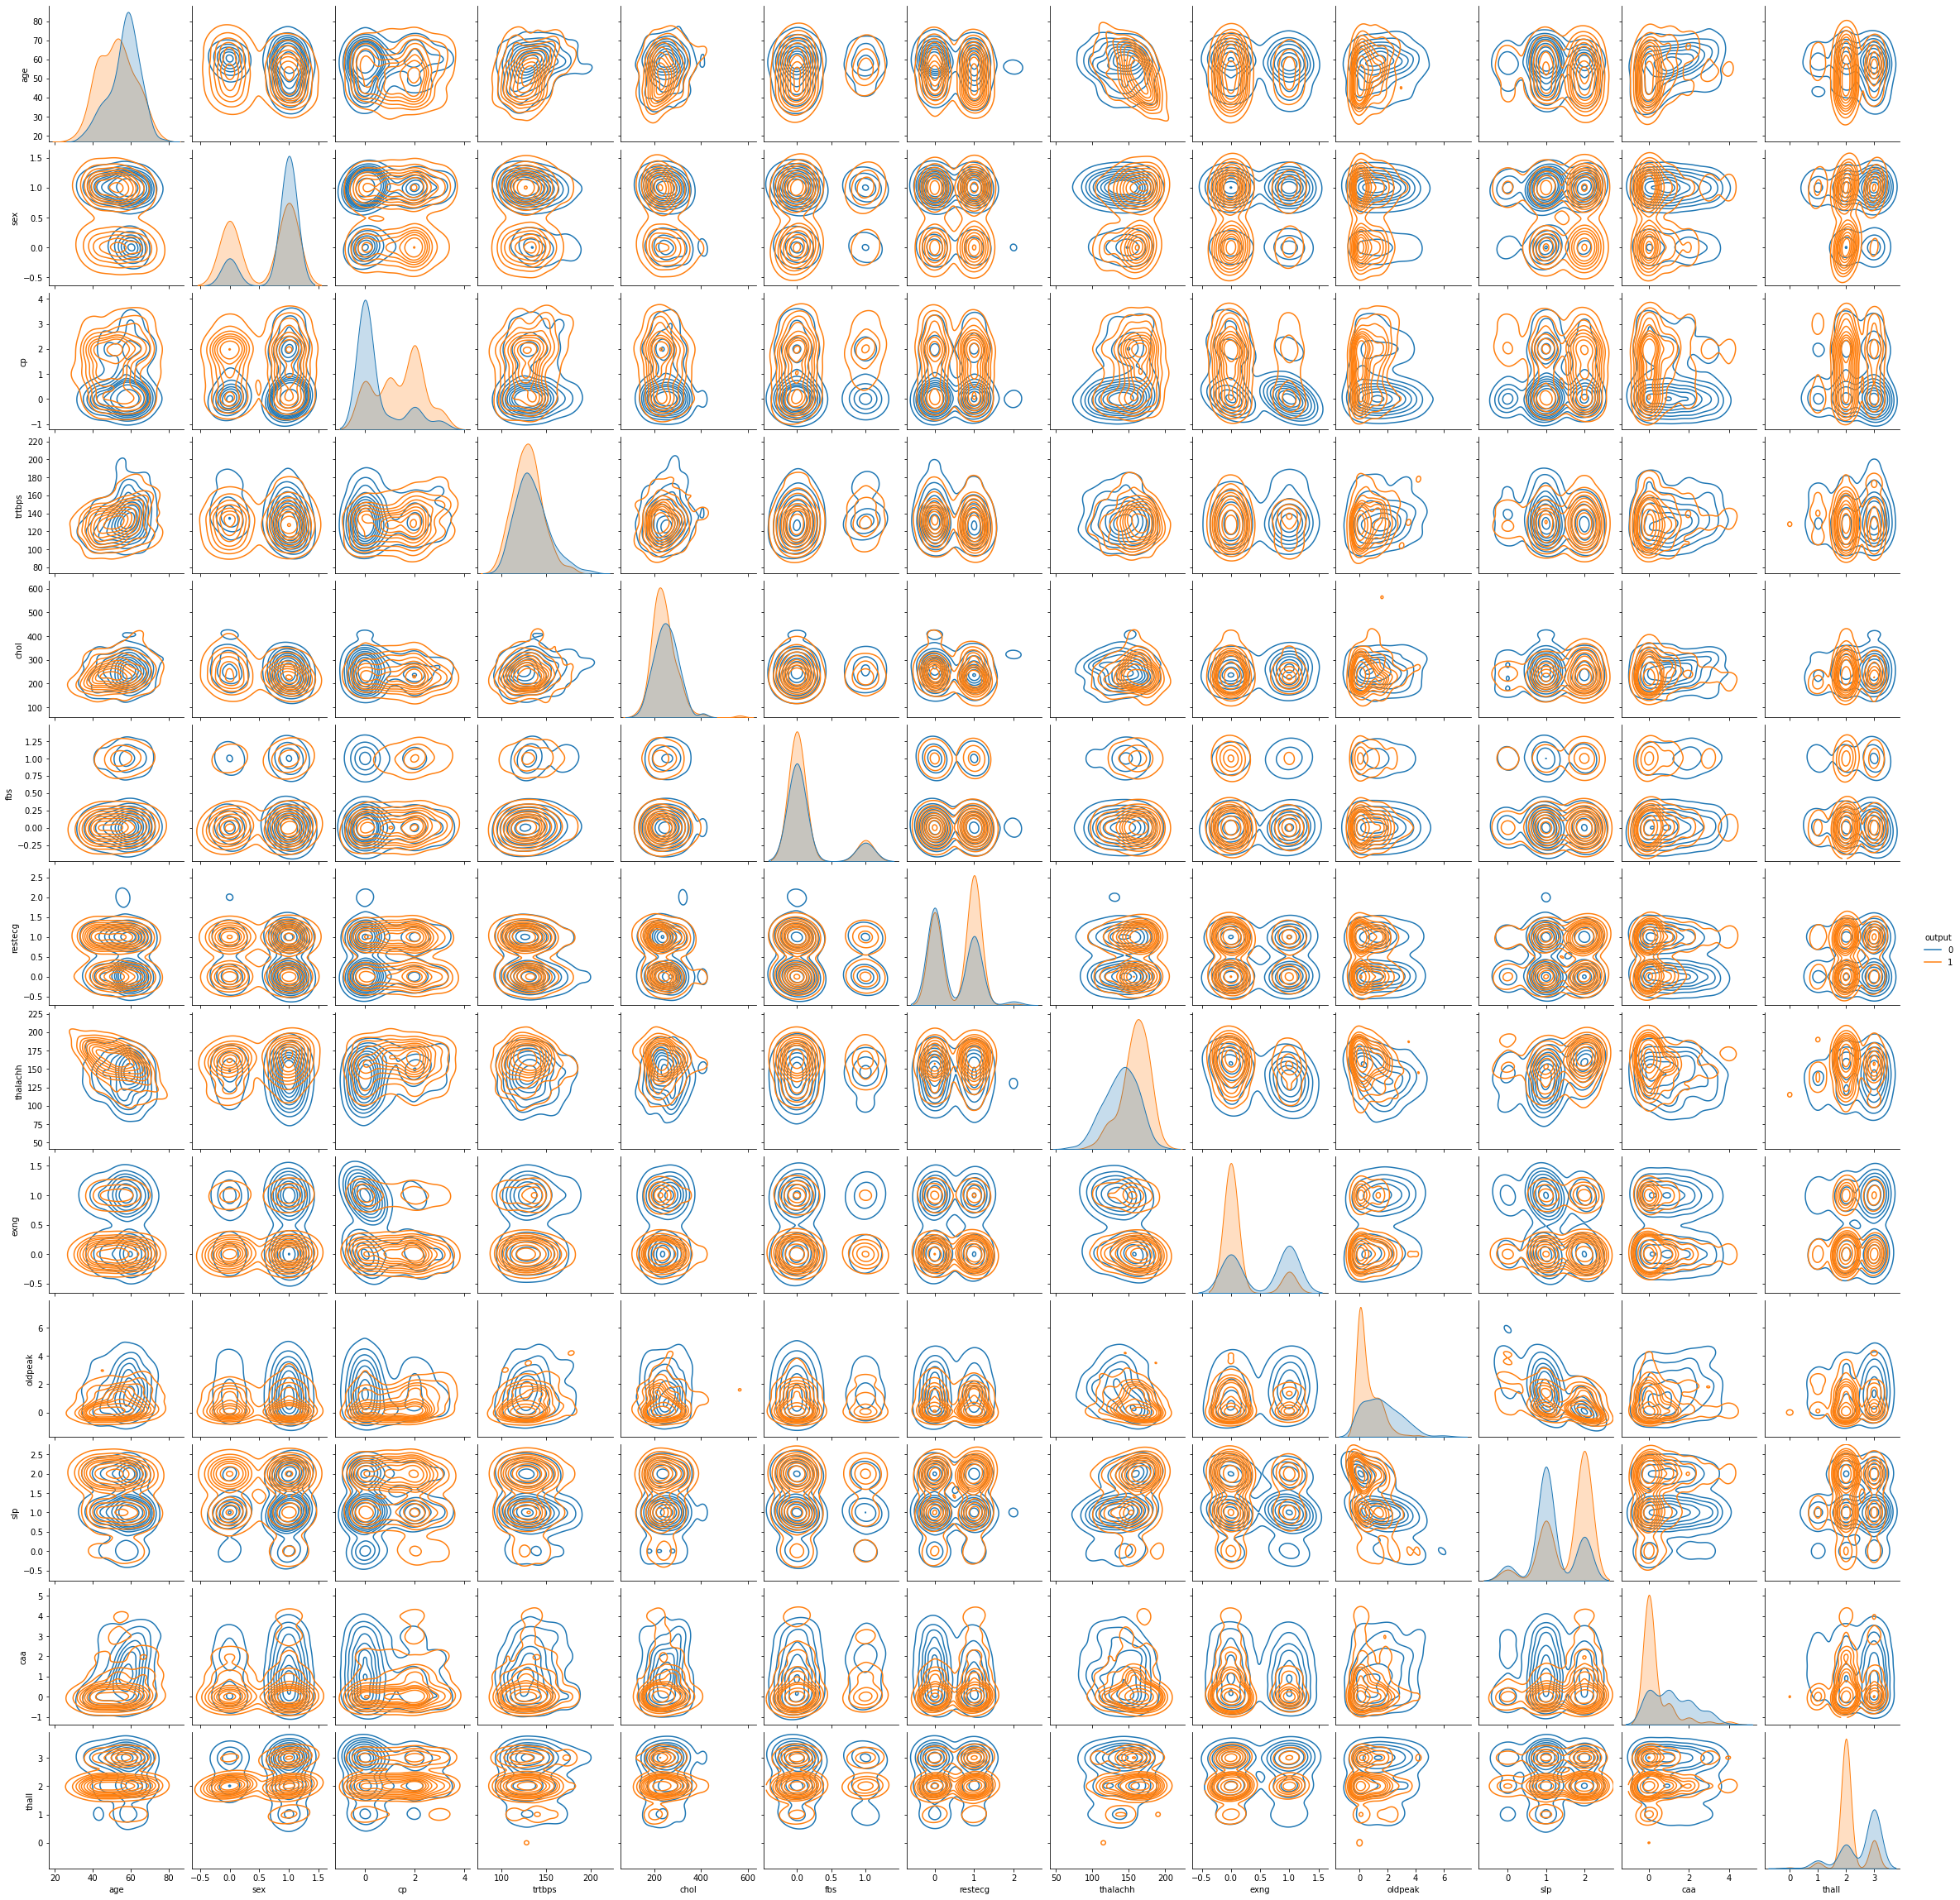

In [19]:
sns.pairplot(df,kind="kde",hue="output")

In [20]:
#split data
X=df.drop(["output"],axis=1)
y=df["output"]

In [21]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [23]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [24]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost=AdaBoostClassifier()
adaBoost.fit(X_train,y_train)
ada_pre=adaBoost.predict(X_test)
acc_adaBoost = accuracy_score(y_test,ada_pre)
acc_adaBoost

0.7868852459016393

In [25]:
key = ['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','XGBClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), RandomForestClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))

In [26]:
predicted =[]

In [27]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8032786885245902
KNeighborsClassifier 0.819672131147541
RandomForestClassifier 0.7868852459016393
XGBClassifier 0.7704918032786885


<AxesSubplot:>

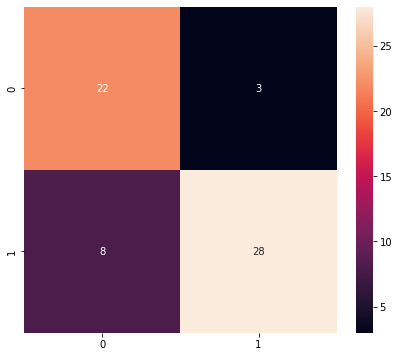

In [28]:
#confusion matrix
cnn=KNeighborsClassifier()
cnn.fit(X_train,y_train)
cnn_predict = cnn.predict(X_test)
cf_matrix=confusion_matrix(y_test,cnn_predict)
plt.figure(figsize=(7,6))
sns.heatmap(cf_matrix,annot=True,fmt='d')

<AxesSubplot:>

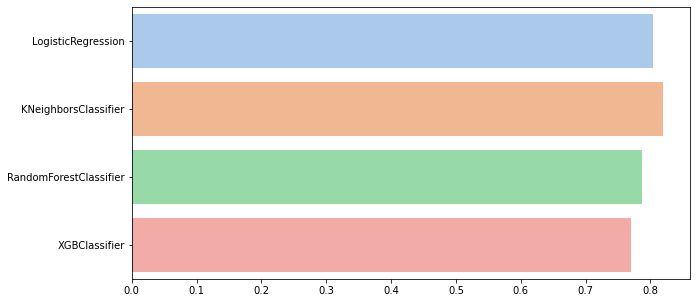

In [29]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')

Summary: 
- Numerical Variables : No outliers were discovered.
- An increased risk of heart attack is associated with high blood pressure, high cholesterol, and high heart rate.
- The target count indicated that there is a higher likelihood of heart attacks.
- Age from 40-60 years have the high chance of heart attack.
- Men are more likely than women to get a heart attack.